# Problem 3

### Gauss-Newton

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log, exp

def gauss_newton(t, y, Dr, y_pred_fxn, c0, tol=1e-6, max_iter=100000):
    c = c0.copy()

    for j in range(max_iter):
        r = y_pred_fxn(t,c) - y

        if np.linalg.norm(r) < tol:
            break
        
        A = Dr(t,c)

        v = np.linalg.solve(A.T @ A, -A.T @ r)

        c += v

    return c, j

In [75]:
# Estabish data vectors
t = np.arange(1,11, dtype=np.float64).T
y = np.array([6.2, 9.5, 12.3, 13.9, 14.6, 13.5, 13.3, 12.7, 12.4, 11.9]).T

Dr = lambda t, c: np.column_stack((t*exp(t*c[1]) , t*t*c[0]*exp(t*c[1])))
y_pred_fxn = lambda t, c: c[0] * t * exp(c[1]*t)

c_gn, iter_gn = gauss_newton(t,y,Dr,y_pred_fxn, np.array([6.,.1]))

y_pred_gn = c_gn[0] * t * exp(c_gn[1] * t)

print(f"c0: {c_gn[0]}, c1: {c_gn[1]}")
print(f"Iterations: {iter_gn}")

c0: 7.054228542648305, c1: -0.18289874347158333
Iterations: 99999


### Levenberg-Marquardt

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log, exp

def lev_mar(t, y, Dr, y_pred_fxn, c0, lmbd, tol=1e-6, max_iter=100000):
    c = c0.copy()

    for j in range(max_iter):
        r = y_pred_fxn(t,c) - y

        if np.linalg.norm(r) < tol:
            break
        
        A = Dr(t,c)

        D = np.diag(np.diag(A.T @ A))
        v = np.linalg.solve(A.T @ A + lmbd * D, -A.T @ r)

        c += v

    return c, j

In [77]:
# Estabish data vectors
t = np.arange(1,11, dtype=np.float64).T
y = np.array([6.2, 9.5, 12.3, 13.9, 14.6, 13.5, 13.3, 12.7, 12.4, 11.9]).T

Dr = lambda t, c: np.column_stack((t*exp(t*c[1]) , t*t*c[0]*exp(t*c[1])))
y_pred_fxn = lambda t, c: c[0] * t * exp(c[1]*t)

c_lm, iter_lm = lev_mar(t,y,Dr,y_pred_fxn, np.array([6.,.1]), 1)

y_pred_lm = c_lm[0] * t * exp(c_lm[1] * t)

print(f"c0: {c_lm[0]}, c1: {c_lm[1]}")
print(f"Iterations: {iter_lm}")

c0: 7.054228542648297, c1: -0.18289874347158316
Iterations: 99999


### Data Linearization

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log, exp

# Estabish data vectors
t = np.arange(1,11, dtype=np.float64).T
y = np.array([6.2, 9.5, 12.3, 13.9, 14.6, 13.5, 13.3, 12.7, 12.4, 11.9]).T

# Define (linearized) least squares vectors
A = np.column_stack((np.ones(10, dtype=np.float64), t))
b_ = log(y) - log(t)

# Solve linearized least squares
c_ = np.linalg.solve(A.T @ A, A.T @ b_.T)
c = c_.copy()
c[0] = exp(c[0]) # Convert linearized solution to orginal form

print(f"c1: {round(c[0],3)}, c2: {round(c[1],3)}")

# Use fitted model to obtain predictions
y_pred = c[0]*t*exp(c[1]*t)

c1: 7.122, c2: -0.184


### Results and Discussion

In [84]:
with np.printoptions(precision=5, suppress=True):
    print(f"Sum of Residuals (Gauss Newton): {np.linalg.norm(y-y_pred_gn)}")
    print(f"Sum of Residuals (Levenberg-Marquardt): {np.linalg.norm(y-y_pred_lm)}")
    print(f"Sum of Residuals (Linearized): {np.linalg.norm(y-y_pred)}")

Sum of Residuals (Gauss Newton): 1.2543574926529986
Sum of Residuals (Levenberg-Marquardt): 1.254357492653
Sum of Residuals (Linearized): 1.2667076986711072


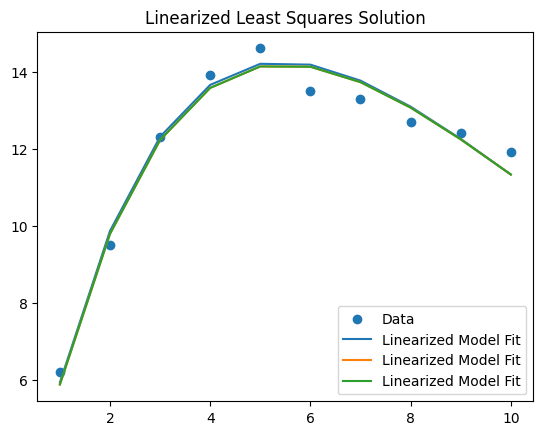

In [85]:
plt.scatter(t,y, label='Data')
plt.plot(t,y_pred, label='Linearized Model Fit')
plt.plot(t,y_pred_gn, label='Linearized Model Fit')
plt.plot(t,y_pred_lm, label='Linearized Model Fit')
plt.legend()
plt.title('Linearized Least Squares Solution')
plt.show()

There is minor improvement from Gauss-Newton vs the original data linearization method, but going from Gauss-Newton to Levenberg-Marquardt there is almost no change. This indicates that the problem is well conditioned and the additional robustness provided by Levenberg-Marquardt is no needed here.